# Introduction
## Dataset
This dataset contains a wealth of customer information collected from within a consumer credit card portfolio, with the aim of helping analysts predict customer attrition. It includes comprehensive demographic details such as age, gender, marital status and income category, as well as insight into each customer’s relationship with the credit card provider such as the card type, number of months on book and inactive periods. Additionally it holds key data about customers’ spending behavior drawing closer to their churn decision such as total revolving balance, credit limit, average open to buy rate and analyzable metrics like total amount of change from quarter 4 to quarter 1, average utilization ratio and Naive Bayes classifier attrition flag (Card category is combined with contacts count in 12months period alongside dependent count plus education level & months inactive). Faced with this set of useful predicted data points across multiple variables capture up-to-date information that can determine long term account stability or an impending departure therefore offering us an equipped understanding when seeking to manage a portfolio or serve individual customers.

## What is Customer Attrition
From optimove.com, customer attrition is the loss of customers by a business. Most customers of a given business will not remain active customers indefinitely. Whether a one-time purchaser or a loyal customer over many years, every customer will eventually cease his or her relationship with the business. This phenomenon of “disappearing” customers is known by many names, including customer attrition, customer churn, customer turnover, customer cancellation and customer defection.

# Method
This Project using Hilary Mason and Chris Wiggins 'OSEMN' method which was post on a now-defunct website titled: <a href="https://web.archive.org/web/20160220042455/dataists.com/2010/09/a-taxonomy-of-data-science/">A Taxonomy of Data Science</a>.

In [1]:
#Data Analysis
import pandas as pd
import numpy as np
#Data Visualization
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/predicting-credit-card-customer-attrition-with-m/BankChurners.csv')
print("# DIMENSIONS -------------------------")
print("Observation:", df.shape[0], "Column:", df.shape[1])
print("# DTYPES -----------------------------")
print("Object Variables:", "\n", "# of Variables:", 
len(df.select_dtypes("object").columns), "\n", 
df.select_dtypes("object").columns.tolist())
print("--------------------------------------")    
print("Integer Variables:", "\n", "# of Variables:", 
len(df.select_dtypes("integer").columns), "\n", 
df.select_dtypes("integer").columns.tolist())
print("--------------------------------------")    
len(df.select_dtypes("float").columns)
print("Float Variables:", "\n", "# of Variables:", 
len(df.select_dtypes("float").columns), "\n", 
df.select_dtypes("float").columns.tolist())
print("--------------------------------------")    
len(df.select_dtypes("bool").columns)
print("Bool Variables:", "\n", "# of Variables:", 
len(df.select_dtypes("bool").columns), "\n", 
df.select_dtypes("bool").columns.tolist())  
print("# MISSING VALUE ----------------------")
print("Are there any missing values? \n ", np.where(df.isnull().values.any() == False, 
"No missing value!", "There are missing values!"))
print("--------------------------------------")

# DIMENSIONS -------------------------
Observation: 10127 Column: 23
# DTYPES -----------------------------
Object Variables: 
 # of Variables: 6 
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
--------------------------------------
Integer Variables: 
 # of Variables: 10 
 ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']
--------------------------------------
Float Variables: 
 # of Variables: 7 
 ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
---------

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


There are no missing values in our numirecal data, but lets check missing values in our categorical data.

First drop unnecessary variables from the dataset.

CLIENTNUM	Unique identifier for each customer. (Integer)

Attrition_Flag	Flag indicating whether or not the customer has churned out. (Boolean)

Customer_Age	Age of customer. (Integer)

Gender	Gender of customer. (String)

Dependent_count	Number of dependents that customer has. (Integer)

Education_Level	Education level of customer. (String)

Marital_Status	Marital status of customer. (String)

Income_Category	Income category of customer. (String)

Card_Category	Type of card held by customer. (String)

Months_on_book	How long customer has been on the books. (Integer)

Total_Relationship_Count	Total number of relationships customer has with the credit card provider. (Integer)

Months_Inactive_12_mon	Number of months customer has been inactive in the last twelve months. (Integer)

Contacts_Count_12_mon	Number of contacts customer has had in the last twelve months. (Integer)

Credit_Limit	Credit limit of customer. (Integer)

Total_Revolving_Bal	Total revolving balance of customer. (Integer)

Avg_Open_To_Buy	Average open to buy ratio of customer. (Integer)

Total_Amt_Chng_Q4_Q1	Total amount changed from quarter 4 to quarter 1. (Integer)

Total_Trans_Amt	Total transaction amount. (Integer)

Total_Trans_Ct	Total transaction count. (Integer)

Total_Ct_Chng_Q4_Q1	Total count changed from quarter 4 to quarter 1. (Integer)

Avg_Utilization_Ratio	Average utilization ratio of customer. (Integer)

In [4]:
# we won't use this data because our target is classify the Attrition Customer from the dataset.
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1,inplace=True)

Our predict value is Attrition_Flag variable (binary: '1','0')

# Scrubbing and Exploring the Data
## EDA

There are 6 Categorical named : 

    1. Attrition_Flag 
    2. Gender 
    3. Education_Level 
    4. Marital_Status 
    5. Income_Category 
    6. Card_Category  

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


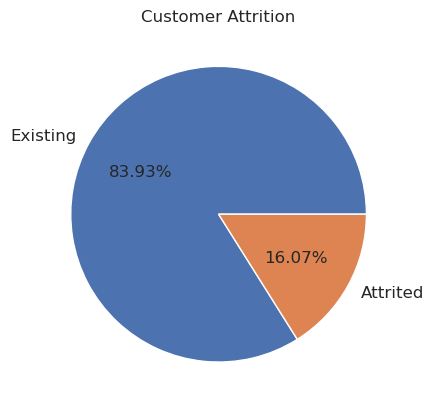

In [5]:
print(df['Attrition_Flag'].value_counts())
plt.pie(df.Attrition_Flag.value_counts(),
        labels = ["Existing", "Attrited"], 
        autopct = '%1.2f%%',textprops={'fontsize':12})
plt.title("Customer Attrition");

This chart shows that from all customer who use the services, 16.07% of them are attrited.

The classes are imbalanced, and the ratio of Attrition Customer to Existing Customer is 84%:16%. 

Before we go ahead to balance the classes, Let's do some more exploration.

### Finding Insight

In [6]:
df.groupby('Attrition_Flag').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


It seem Credit_Limit, Total_Revolving_Bal, Total_Transaction_Amt, Total_Transaction_Ct and Avg_Utilization_Ratio are higher on Existing Customer, it is understandable because the more customer is have relation with the services, the more credit is offer to the customer. It is prove by the  Attritied Customer have high mean variable Months_Inactive_12_mon and Contacts_Count_12_mon. 

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [7]:
df.groupby('Gender').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Gender,,,,,,,,,,,,,,
F,46.456887,2.340612,35.979097,3.807951,2.351810,2.413587,5023.854274,1140.011198,3883.843076,0.754417,4324.318216,66.352370,0.713525,0.341957
M,46.178863,2.352485,35.871462,3.817782,2.329209,2.502202,12685.674963,1188.433215,11497.241749,0.766147,4493.706228,63.180541,0.710759,0.199548


In [8]:
df.groupby('Education_Level').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Education_Level,,,,,,,,,,,,,,
College,45.970385,2.359329,35.682132,3.749260,2.353406,2.425469,8684.536130,1135.783810,7548.752320,0.764443,4255.806515,65.016782,0.714878,0.265399
Doctorate,47.261641,2.325942,36.820399,3.747228,2.352550,2.450111,8413.258980,1094.084257,7319.174723,0.741044,4193.015521,63.784922,0.692656,0.260619
Graduate,46.323529,2.347506,35.970588,3.825128,2.350064,2.459719,8566.100927,1162.380115,7403.720812,0.757418,4418.491368,64.883312,0.710724,0.277719
High School,46.345256,2.311972,35.970691,3.807253,2.329856,2.446597,8605.823547,1194.353204,7411.470343,0.762508,4403.740189,64.692996,0.714512,0.278275
Post-Graduate,45.562016,2.399225,35.352713,3.893411,2.313953,2.422481,8862.560465,1187.674419,7674.886047,0.767705,4515.414729,65.000000,0.702709,0.280572
Uneducated,46.423672,2.353060,35.949563,3.843309,2.365837,2.488904,8899.509011,1154.079354,7745.429657,0.760446,4484.340955,65.315400,0.719299,0.271590
Unknown,46.428571,2.361422,35.859776,3.797893,2.311389,2.457538,8491.798947,1160.449638,7331.349309,0.761209,4420.053325,64.745885,0.712616,0.276469


In [9]:
df.groupby('Marital_Status').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Marital_Status,,,,,,,,,,,,,,
Divorced,45.116310,2.377005,35.145722,3.863636,2.347594,2.422460,9358.565107,1155.981283,8202.583824,0.755584,4529.090909,66.925134,0.702525,0.256947
Married,46.735012,2.366332,36.213996,3.841050,2.333476,2.457222,8076.661895,1197.163644,6879.498250,0.772312,4173.417965,61.725411,0.715721,0.289650
Single,46.213036,2.279990,35.877758,3.778849,2.352523,2.466396,8999.684758,1124.241441,7875.443317,0.748048,4594.554400,67.756531,0.709308,0.264366
Unknown,45.568758,2.538051,35.189586,3.761015,2.323097,2.417891,9445.283178,1157.748999,8287.534179,0.749482,4720.005340,67.146862,0.715356,0.255899


In [10]:
df.groupby('Income_Category').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Income_Category,,,,,,,,,,,,,,
$120K +,47.603851,2.462173,36.891334,3.778542,2.331499,2.537827,19717.322558,1222.196699,18495.125860,0.752459,4529.467675,63.704264,0.688702,0.125307
$40K - $60K,46.087151,2.308380,35.873184,3.783240,2.294413,2.460894,5462.259832,1171.994413,4290.265419,0.759531,4405.618994,65.000559,0.711113,0.316561
$60K - $80K,45.968616,2.440086,35.597004,3.833809,2.329529,2.455777,10758.772967,1154.993581,9603.779387,0.772189,4450.712553,63.247504,0.720776,0.206075
$80K - $120K,46.428013,2.492508,36.074267,3.816938,2.327036,2.485342,15809.890945,1206.727036,14603.163909,0.766633,4482.960261,62.696417,0.713868,0.161664
Less than $40K,46.297950,2.263690,35.881775,3.823364,2.367032,2.420388,3754.404521,1145.136759,2609.267762,0.752417,4363.420107,66.154732,0.711770,0.377280
Unknown,46.274281,2.275180,35.753597,3.814748,2.374101,2.462230,9516.582464,1115.064748,8401.517716,0.764903,4282.211331,66.250899,0.717778,0.220810


In [11]:
df.groupby('Card_Category').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Card_Category,,,,,,,,,,,,,,
Blue,46.372404,2.336477,35.960682,3.848665,2.345697,2.455596,7363.780002,1157.812209,6205.967794,0.759602,4225.406740,64.028190,0.712572,0.290859
Gold,45.439655,2.672414,35.525862,3.008621,2.310345,2.448276,28416.370690,1344.318966,27072.051724,0.772603,7685.612069,81.517241,0.706190,0.057103
Platinum,47.500000,2.450000,36.250000,2.300000,2.250000,2.500000,30283.450000,1267.950000,29015.500000,0.780100,8999.750000,86.950000,0.666200,0.043650
Silver,45.679279,2.439640,35.452252,3.421622,2.273874,2.450450,25277.836036,1206.129730,24071.706306,0.762326,6590.482883,74.700901,0.709191,0.057310


### Dealing with Missing Values

There are Missing Value in Education Level, Marital Status, and Income Category which are named 'Unknown' values.

Let's subtitute it with a reasonable data based on our insight.

First Insight : 
1. Gender : Male have higher Credit_Limit and Avg_to_Buy.
2. Education : there is no insight in this variable.
3. Marital : The marital status have differences in Credit_Limit and Avg_to_Buy
4. Income : The income category have diferences in Credit_Limit and Avg_to_Buy plus the more income the customer earn, Avg_Utilization_Ratio is reduce.
5. Card : Blue card have more total relationship, but decrease when the class is upgrade platinum is have less relationship. It also higher Credit_Limit and Avg_to_Buy following the class. It also the transaction done by customer is relative low with the blue and higher with platinum.

In [12]:
df_clean = df.copy(deep = True)
df_clean[
    ['Education_Level','Marital_Status','Income_Category']
         ] = df_clean[
    ['Education_Level','Marital_Status','Income_Category']
].replace('Unknown',np.NaN)

print(df_clean.isnull().sum())

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


There are 1519 missing value in Education Level, 749 in Marital Status, and 1112 Income Category.

It's difficult task to determine Education Level of someone because no correlation with our variable,

We can't simply define someone degree from their age, salary, or credit limit. It is independent categories.

For Income Category and Marital Status, let see these values based on the mean of Credit Limit.

The more income you have, the bigger limit provided from the Bank.

In [13]:
df_clean.groupby('Marital_Status')['Credit_Limit'].mean()

Marital_Status
Divorced    9358.565107
Married     8076.661895
Single      8999.684758
Name: Credit_Limit, dtype: float64

In [14]:
def impute_marital(cols):
    Marital_Status = cols[0]
    Credit_Limit = cols[1]
    
    if pd.isnull(Marital_Status):
        if Credit_Limit < 8077:
            return 'Married'
        elif Credit_Limit < 9000:
            return 'Single'
        else:
            return 'Divorced'
    else:
        return Marital_Status

In [15]:
df_clean['Marital_Status'] = df_clean[['Marital_Status','Credit_Limit']].apply(impute_marital,axis=1)

In [16]:
df_clean.groupby('Income_Category')['Credit_Limit'].mean()

Income_Category
$120K +           19717.322558
$40K - $60K        5462.259832
$60K - $80K       10758.772967
$80K - $120K      15809.890945
Less than $40K     3754.404521
Name: Credit_Limit, dtype: float64

In [17]:
def impute_income(cols):
    Income_Category = cols[0]
    Credit_Limit = cols[1]
    
    if pd.isnull(Income_Category):
        if Credit_Limit < 3755:
            return 'Less than $40K'
        elif Credit_Limit < 5463:
            return '$40K - $60K'
        elif Credit_Limit < 10759:
            return '$60K - $80K'
        elif Credit_Limit < 15810:
            return '$80K - $120K'
        else:
            return '$120K +'
    else:
        return Income_Category

In [18]:
df_clean['Income_Category'] = df_clean[['Income_Category','Credit_Limit']].apply(impute_income,axis=1)

In [19]:
df_clean.dropna(inplace=True)
print(df_clean.isnull().sum())

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


### Visual the Data

F    4546
M    4062
Name: Gender, dtype: int64


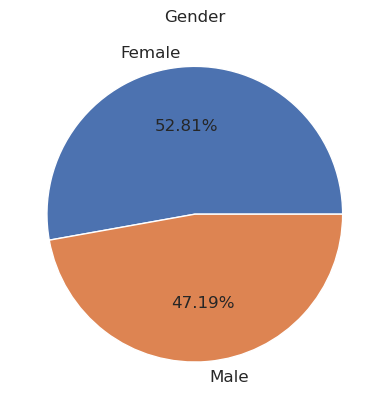

In [20]:
print(df_clean['Gender'].value_counts())
plt.pie(df_clean.Gender.value_counts(),
        labels = ["Female", "Male"], 
        autopct = '%1.2f%%',textprops={'fontsize':12})
plt.title("Gender");

This chart shows that the customer is consist of 52.91% female and 47.09% male.
It seems not good predictor.

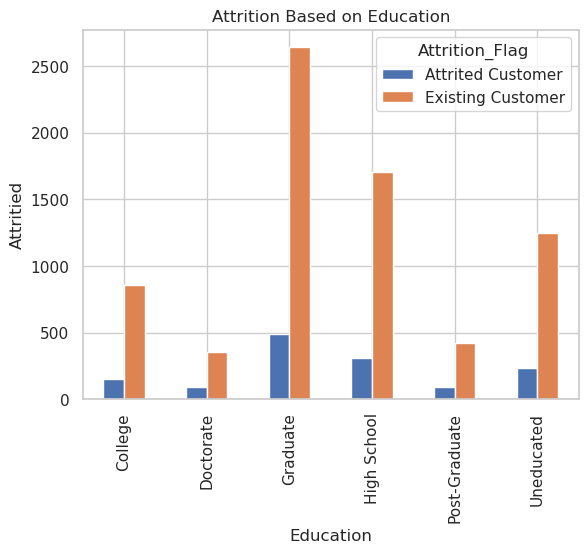

In [21]:
pd.crosstab(df_clean.Education_Level,df_clean.Attrition_Flag).plot(kind='bar')
plt.title('Attrition Based on Education')
plt.xlabel('Education')
plt.ylabel('Attritied');

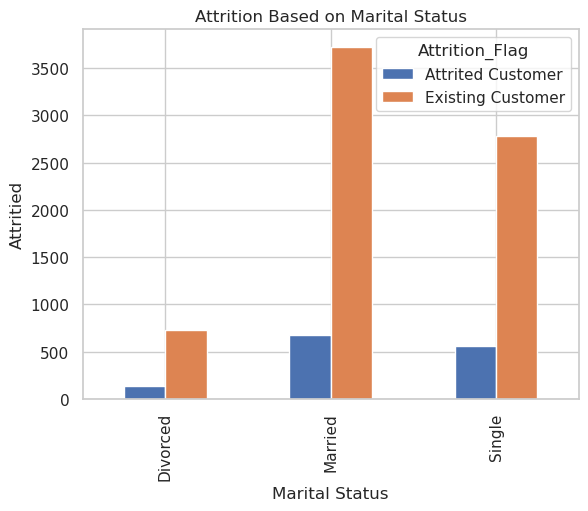

In [22]:
pd.crosstab(df_clean.Marital_Status,df_clean.Attrition_Flag).plot(kind='bar')
plt.title('Attrition Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attritied');

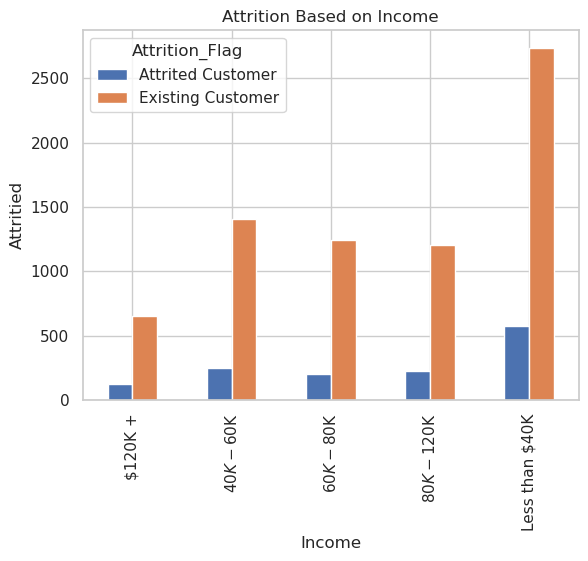

In [23]:
pd.crosstab(df_clean.Income_Category,df_clean.Attrition_Flag).plot(kind='bar')
plt.title('Attrition Based on Income')
plt.xlabel('Income')
plt.ylabel('Attritied');

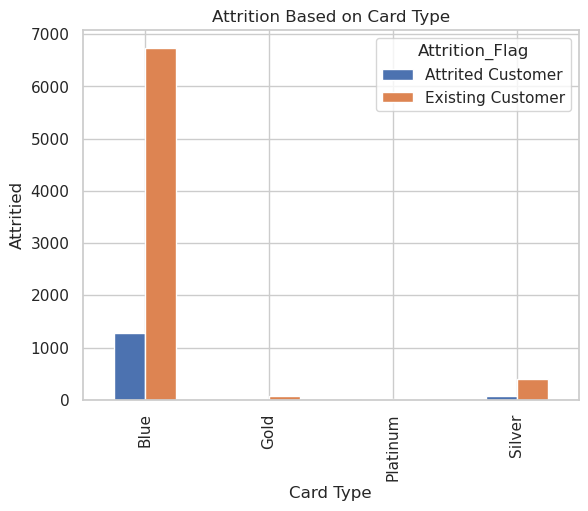

In [24]:
pd.crosstab(df_clean.Card_Category,df_clean.Attrition_Flag).plot(kind='bar')
plt.title('Attrition Based on Card Type')
plt.xlabel('Card Type')
plt.ylabel('Attritied');

All categoricals variables except gender seems good as predictor.

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            8608 non-null   object 
 1   Customer_Age              8608 non-null   int64  
 2   Gender                    8608 non-null   object 
 3   Dependent_count           8608 non-null   int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            8608 non-null   object 
 6   Income_Category           8608 non-null   object 
 7   Card_Category             8608 non-null   object 
 8   Months_on_book            8608 non-null   int64  
 9   Total_Relationship_Count  8608 non-null   int64  
 10  Months_Inactive_12_mon    8608 non-null   int64  
 11  Contacts_Count_12_mon     8608 non-null   int64  
 12  Credit_Limit              8608 non-null   float64
 13  Total_Revolving_Bal       8608 non-null   int64  
 14  Avg_Ope

## Data Preprocessing
### Create Dummies

In [26]:
df_clean['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

In [27]:
cat_vars=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_clean[var], prefix=var)
    df_dum=df_clean.join(cat_list)
    df_clean=df_dum
    
cat_vars=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
data_vars=df_clean.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=df_clean[to_keep]
data_final.columns.values

array(['Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'], dtype=object)

### SMOTE  Algorithm
With our training data created, I’ll up-sample the Attritied Customer using the SMOTE (Synthetic Minority Oversampling Technique) algorithm.

At a high level, SMOTE and ADASYN: Synthetic Minority Oversampling Technique (SMOTE) and the Adaptive Synthetic (ADASYN) are 2 methods used in oversampling. These also generate low examples but ADASYN takes into account the density of distribution to distribute the data points evenly.

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [29]:
X = data_final.loc[:, data_final.columns != 'Attrition_Flag']
y = data_final.loc[:, data_final.columns == 'Attrition_Flag']

In [30]:
smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
columns = X_train.columns

X_smote,y_smote= smote.fit_resample(X_train, y_train)
X_smote = pd.DataFrame(data=X_smote,columns=columns)
y_smote = pd.DataFrame(data=y_smote,columns=['Attrition_Flag'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_smote))
print("Number of Attritied in oversampled data",len(y_smote[y_smote['Attrition_Flag']==0]))
print("Number of Existing",len(y_smote[y_smote['Attrition_Flag']==1]))
print("Proportion of Attritied data in oversampled data is ",len(y_smote[y_smote['Attrition_Flag']==0])/len(X_smote))
print("Proportion of Existing data in oversampled data is ",len(y_smote[y_smote['Attrition_Flag']==1])/len(X_smote))

length of oversampled data is  9732
Number of Attritied in oversampled data 4866
Number of Existing 4866
Proportion of Attritied data in oversampled data is  0.5
Proportion of Existing data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Modelling
## Overall Model Accuracy Test

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss

In [32]:
classifiers = [
    LogisticRegression(solver='lbfgs',max_iter=200),
    KNeighborsClassifier(2),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    BernoulliNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [33]:
print('****Results****')
for clf in classifiers:
    clf.fit(X_smote, y_smote)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.2%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

****Results****
LogisticRegression
Accuracy: 80.64%
Log Loss: 0.43
KNeighborsClassifier
Accuracy: 87.50%
Log Loss: 3.5
SVC
Accuracy: 72.37%
Log Loss: 0.57
DecisionTreeClassifier
Accuracy: 91.41%
Log Loss: 3.1
RandomForestClassifier
Accuracy: 94.65%
Log Loss: 0.18
AdaBoostClassifier
Accuracy: 94.33%
Log Loss: 0.64
GradientBoostingClassifier
Accuracy: 95.42%
Log Loss: 0.14
GaussianNB
Accuracy: 76.45%
Log Loss: 0.55
BernoulliNB
Accuracy: 75.96%
Log Loss: 0.52
LinearDiscriminantAnalysis
Accuracy: 89.37%
Log Loss: 0.28
QuadraticDiscriminantAnalysis
Accuracy: 83.46%
Log Loss: 6.0


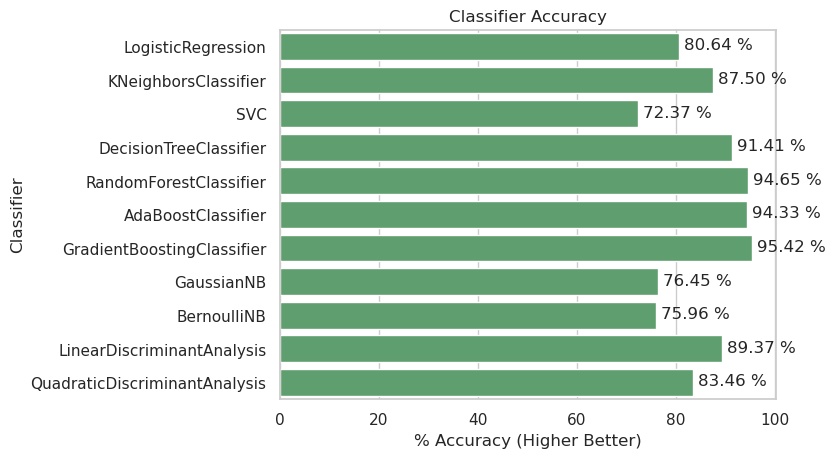

In [34]:
ax = sns.barplot(x='Accuracy', y='Classifier', data=log, color='g')
for p in ax.patches:
    ax.annotate("{:.2f} %".format(p.get_width()), 
                (p.get_x() + p.get_width() + 1, p.get_y() + .5))
                
plt.xlabel('% Accuracy (Higher Better)')
plt.title('Classifier Accuracy');

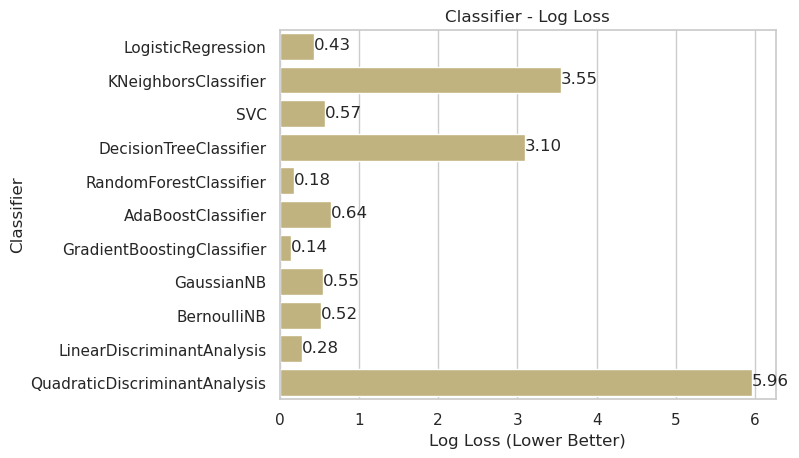

In [35]:
ax = sns.barplot(x='Log Loss', y='Classifier', data=log,color='y')
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_width()), 
                (p.get_x() + p.get_width(), p.get_y() + .5))
plt.xlabel('Log Loss (Lower Better)')
plt.title('Classifier - Log Loss')
plt.show()

We have a best model classifier based on accuracy and error. Gradient Boosting Classifier with >95% accuracy with low loss. Next we want to tune the dependent variables that affect our target variable model using Recursive Feature Elimination then calculate the P-Value to see the significant variables.

### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted.

In [36]:
from sklearn.feature_selection import RFE

In [37]:
data_final_vars = data_final.columns.values.tolist()
y = ['Attrition_Flag']
X = [i for i in data_final_vars if i not in y]

Because our previous accuracy is in good form, lets pick 90% of all train variables to our tuned variables.

In [38]:
len(X_smote.columns) * 0.80

27.200000000000003

In [39]:
gbc = GradientBoostingClassifier()

rfe = RFE(estimator=gbc,n_features_to_select=28)
rfe.fit(X_smote, y_smote.values.ravel())

print(X_smote.columns[rfe.support_])

Index(['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K'],
      dtype='object')


The Recursive Feature Elimination (RFE) has helped us select the best features for our Gradient Boosting Model:

In [40]:
cols = X_smote.columns[rfe.support_]
X = X_smote[cols]
y = y_smote['Attrition_Flag']

### Significant Test

In [41]:
import statsmodels.api as sm
from scipy import stats

In [42]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.245847
         Iterations 8
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.645    
Dependent Variable:      Attrition_Flag        AIC:                   4841.1609
Date:                    2023-07-08 04:42      BIC:                   5042.2898
No. Observations:        9732                  Log-Likelihood:        -2392.6  
Df Model:                27                    LL-Null:               -6745.7  
Df Residuals:            9704                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          8.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

Our model fitted >65%, not a good fit though and we have some dependent variables p-value higher than 0.05, lets drop that values.

In [43]:
X.drop(['Months_on_book','Gender_M'],axis=1,inplace=True)

## Model Fitting

Now lets see the final result of our model using Gradient Boosting Classifier.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [45]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
gbc_pred = gbc_model.predict(X_test)

In [46]:
print('Accuracy of Gradient Boosting Classifier on test set:  {:.2%}'.format(gbc_model.score(X_test, y_test)))

Accuracy of Gradient Boosting Classifier on test set:  97.10%


With this applied tuned variables, we have new >97% accuracy instead >95%.

# iNterpreting Data

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

## Classification Report

In [48]:
print('=' * 55)
print(' Gradient Boosting Classifier')
print('=' * 55)
print(classification_report(y_test,gbc_pred))
print('=' * 55)

 Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1607
           1       0.97      0.97      0.97      1605

    accuracy                           0.97      3212
   macro avg       0.97      0.97      0.97      3212
weighted avg       0.97      0.97      0.97      3212



The precision : the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall : the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0 which is means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

Lets see the number of success predict through Confusion Matrix 

## Confusion Matrix

In [49]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.colorbar()
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')

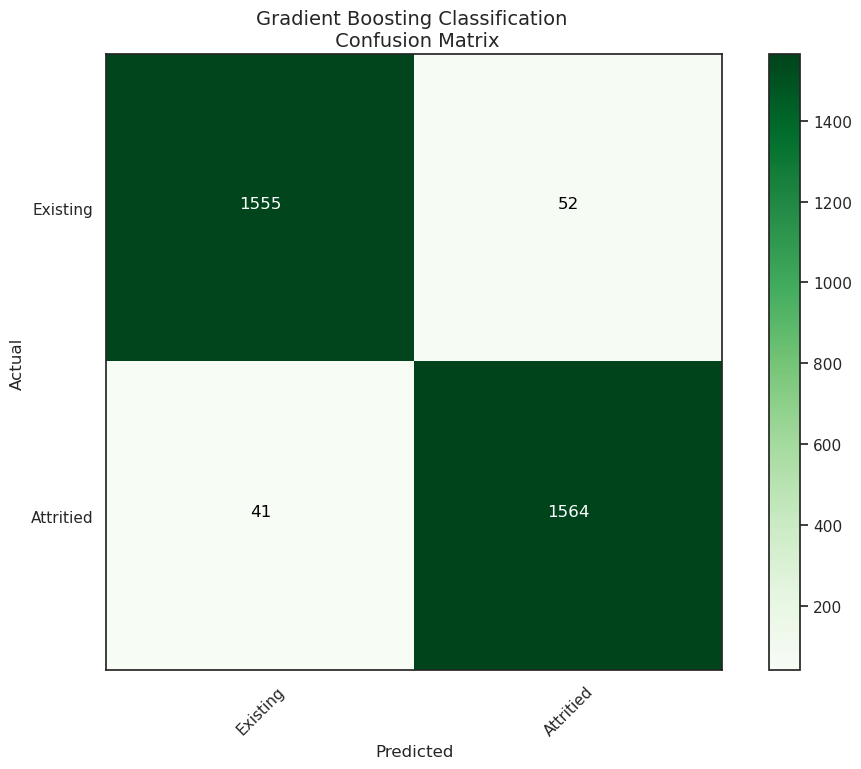

In [50]:
labels = ['Existing', 'Attritied']
sns.set_style('white')
fig = plt.figure(figsize=(12,8))
plot_confusion_matrix(confusion_matrix(y_test, gbc_pred), labels, title="Gradient Boosting Classification \n Confusion Matrix", cmap=plt.cm.Greens)

Overall our Gradient Boosting Classifier have better perfomance in all aspect.

## Receiver Operating Characteristic

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

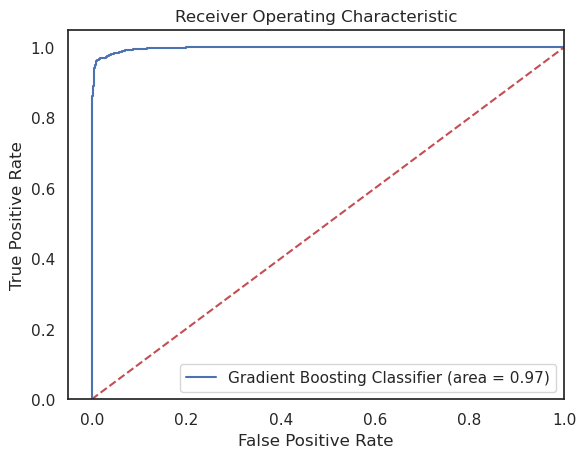

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbc_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusion

So, we have tried to analyze and create a best model to predict the customer attiriton from the dataset by exploring and vizualising the various parameters related to the customer. We also get rid of the missing values.

We have solve the over-sampling problem with SMOTE Method, and tune the model by eliminated some variables based one Recursive Feature and P-Value analysis.

From all the model tested, our Gradient Boosting are have the best performance (highest accuracy with lowest loss). The Confusion Matrix describe detailed performances.